In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["target"] = iris.target
df["flower name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(["target","flower name"],axis="columns"),df.target)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators = 10)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [15]:
model.score(x_test,y_test)

0.9473684210526315

In [18]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [19]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[13,  0,  0],
       [ 0, 16,  1],
       [ 0,  1,  7]], dtype=int64)

Text(50.722222222222214, 0.5, 'true value')

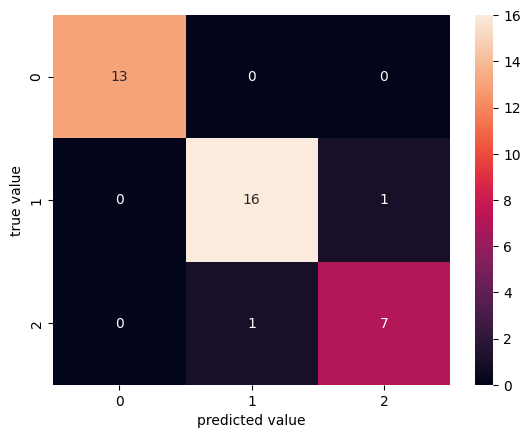

In [20]:
%matplotlib inline
plt.Figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted value")
plt.ylabel("true value")